In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/activity_inequality_walkscore_uscities_wincome_20170508.csv")

In [4]:
# Relevel factor for ordering
levels = c('[28831, 44804]', '(44804, 51407]', '(51407, 58807]', '(58807, 112263]')
df$median_household_income_2015_binned = factor(df$median_household_income_2015_binned, levels=levels)

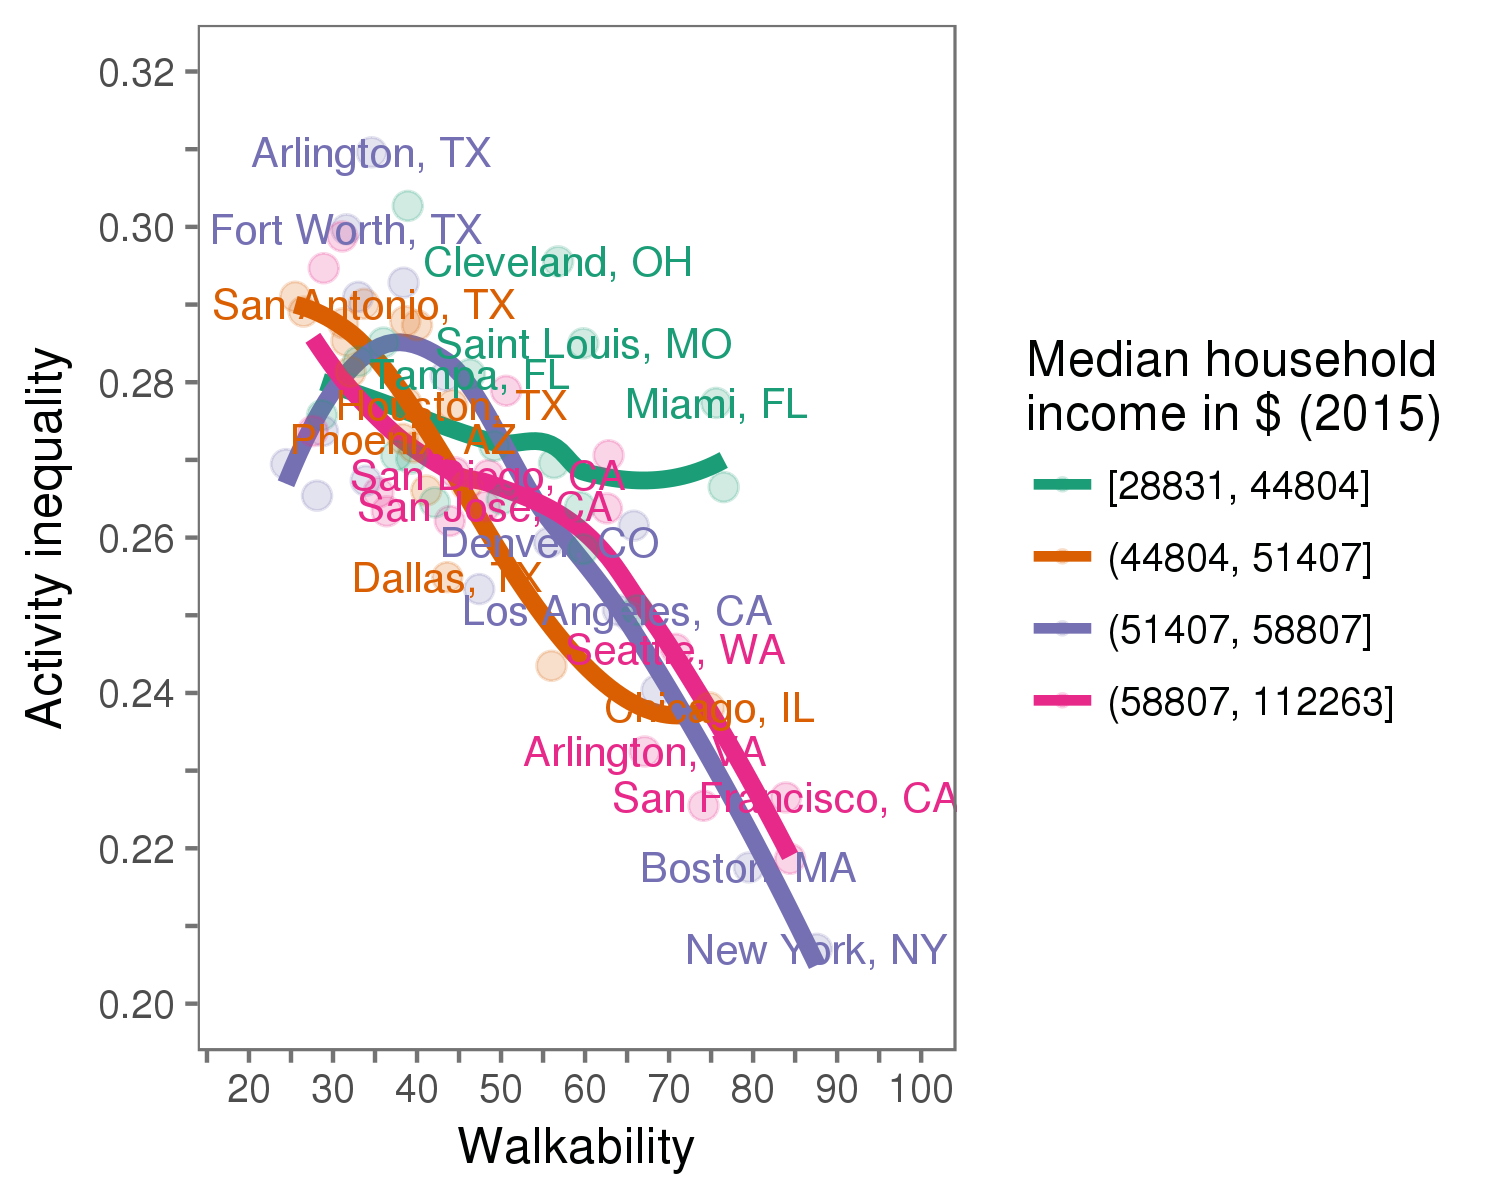

In [5]:
p <- ggplot(df, aes(walkability, gini, label=city, color=median_household_income_2015_binned))
p <- p + geom_smooth(method="loess",span=.9,  se = F, size=2.0,alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)

p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + ylab("Activity inequality") + xlab("Walkability")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Dark2", name="Median household\nincome in $ (2015)")
# yticks
ticks = seq(.20,.32,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels, limits=c(.20, .32))
# xticks
ticks = seq(0,100,by=5) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%d", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(18, 100))
p <- p + guides(color = guide_legend(override.aes = list(size=1.2)))

p

ggsave(filename="../output/edfig8.pdf", plot=p, width=4, height=3)